In [155]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
# from vedo import dataurl, download
# from vedo.dolfin import plot as plot3D
# from vedo import settings
# settings.default_backend='vtk'

In [156]:
!dolfin-convert data/mesh/DD.msh data/mesh/DD.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 161 vertices
Found all vertices
Expecting 270 cells
Found all cells
Conversion done


In [157]:
#Load mesh
meshfile = "data/mesh/DD" 
mesh = Mesh(meshfile + ".xml")
bounds = MeshFunction("size_t", mesh, meshfile + "_facet_region.xml")


In [158]:
#Timevariables

alpha = 30
beta = 12
dt=Constant(0.3)
t=float(dt)
T=1.8
g_expr='1+x[0]*x[0]+alpha*x[1]*x[1]+beta*t'
g=Expression(g_expr,alpha=alpha,beta=beta,t=0,degree=2)
print(g._cpp_object)

In [159]:
n = FacetNormal(mesh)
h = mesh.hmin()

Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


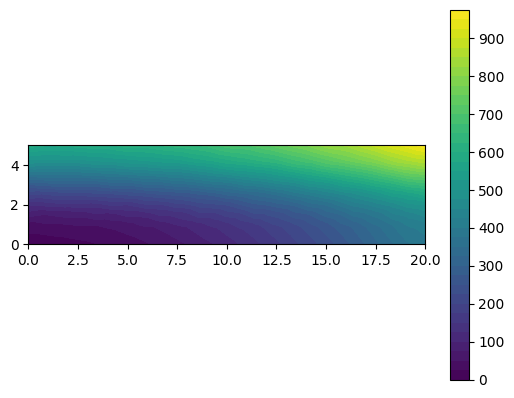

Solving linear variational problem.


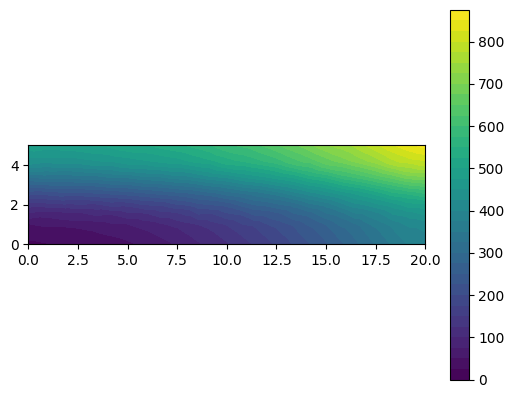

Solving linear variational problem.


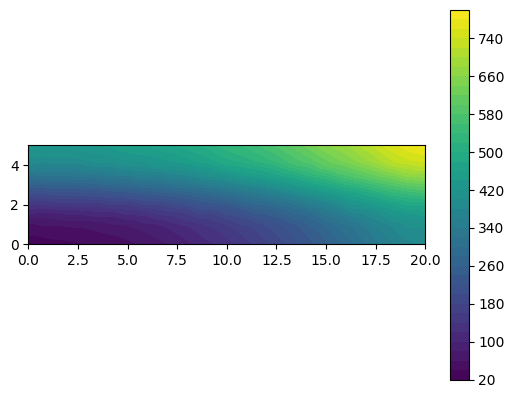

Solving linear variational problem.


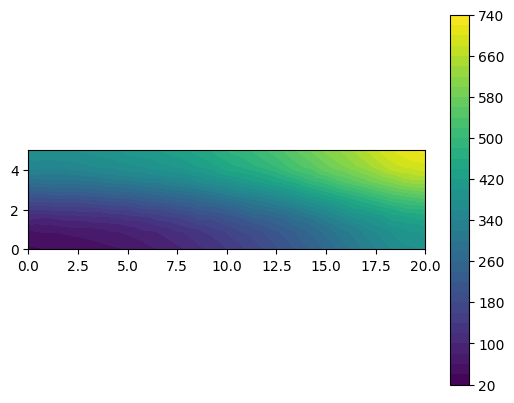

Solving linear variational problem.


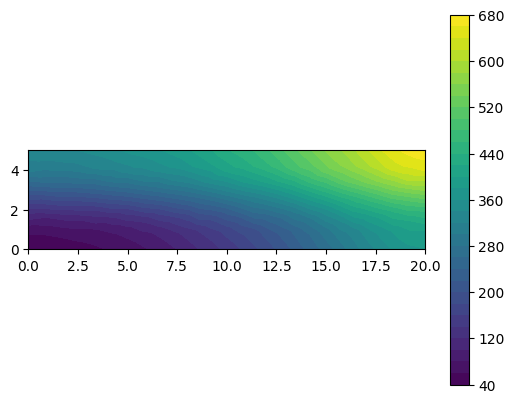

Solving linear variational problem.


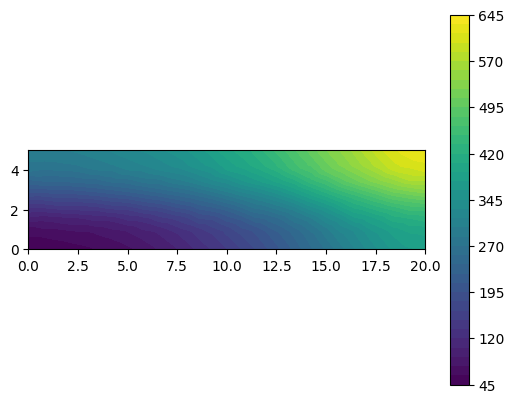

In [160]:

V = FunctionSpace(mesh,"DG",1)
u0 =interpolate(g,V)
u1 = Function(V)


#Variationalproblemateachtime
u=TrialFunction(V)
v=TestFunction(V)
f=Constant(beta - 2 - 2*alpha)
a_int=u*v*dx+dt*inner(grad(u),grad(v))*dx 
a_facet = 10/avg(h)*dot(jump(v,n),jump(u,n))*dS - dot(avg(grad(v)), jump(u, n))*dS - dot(jump(u, n), avg(grad(v)))*dS
a = a_facet + a_int
L=u0*v*dx+dt*f*v*dx

bc_x=DirichletBC(V,g,bounds,5)
bc_xtreme=DirichletBC(V,g,bounds,6)
bcs = [bc_x,bc_xtreme]


while(t<=T):
    #Solve
    g.t=t
    solve(a==L,u1,bcs)
    #Update
    u0.assign(u1)
    
    sol = plot(u1)
    plot(u1)
    plt.colorbar(sol)
    plt.show()

    t+=float(dt)

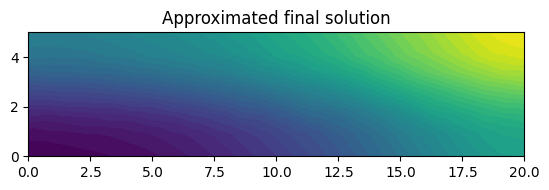

In [161]:

plot(u1,title="Approximated final solution")